## Reading the dataset

We will focus on only one stock 'BHEL' as each stock has its own profile. We read data from the local MongoDB that was set up in the data sourcing step. We get all features for the exploration.

In [17]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/?readPreference=primary&appname=MongoDB+Compass&directConnection=true&ssl=false')
filter={}
collection = client['niftyfifty']['stock-data']
bheldata = []
data = collection.find({'Stock': {"$eq" : 'BHEL'}},{'_id':0})
bheldata = [d for d in data]


We import the pandas library for data handling. We make a DataFrame object from the BHEL data. df.head() shows the first 5 records.

In [18]:
import pandas as pd
df = pd.DataFrame(bheldata)
df.head()

,Date,Stock,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX
0,2021-03-25,BHEL,48.20,47.837243,1.14,50.620095,49.984186,44.359176,13.521698,27.052287,25.770266
1,2021-03-26,BHEL,48.70,49.217338,1.14,50.316442,49.885692,44.539209,11.795044,26.153730,26.632177
2,2021-03-30,BHEL,48.95,49.930643,0.96,50.031634,49.777531,44.704338,11.387699,25.648988,27.480296
3,2021-03-31,BHEL,48.75,49.333639,0.95,50.198610,49.889194,44.949266,11.377414,24.695203,28.154517
4,2021-04-01,BHEL,50.95,55.619693,0.98,49.980681,49.804509,45.108118,14.616430,23.022029,27.738656


Next, we make the Date column index to easily extract time related data easily.

In [27]:
df.index = df.Date
df = df.drop('Date',axis=1)
df

,Stock,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX
Date,,,,,,,,,,
2021-03-25,BHEL,48.20,47.837243,1.14,50.620095,49.984186,44.359176,13.521698,27.052287,25.770266
2021-03-26,BHEL,48.70,49.217338,1.14,50.316442,49.885692,44.539209,11.795044,26.153730,26.632177
2021-03-30,BHEL,48.95,49.930643,0.96,50.031634,49.777531,44.704338,11.387699,25.648988,27.480296
2021-03-31,BHEL,48.75,49.333639,0.95,50.198610,49.889194,44.949266,11.377414,24.695203,28.154517
2021-04-01,BHEL,50.95,55.619693,0.98,49.980681,49.804509,45.108118,14.616430,23.022029,27.738656
...,...,...,...,...,...,...,...,...,...,...
2022-03-16,BHEL,51.20,46.657319,1.53,50.828000,51.417695,54.402991,17.322229,29.810224,27.016193
2022-03-17,BHEL,51.40,47.357464,1.54,50.804727,51.349343,54.257775,18.838875,29.003034,26.603987
2022-03-21,BHEL,50.70,45.125007,1.53,50.840231,51.316072,54.130020,18.066207,30.050646,26.482770


We use the describe function provided on a DataFrame object. It tells us that there are 246 records for BHEL. All the features have a wide variety of ranges but they are somewhat around the range of closing price. Except RSI, which is supposed to be between 0 and 100.

In [28]:
df.describe()

,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,60.244309,49.022986,1.335041,60.258229,60.211072,59.288053,20.860178,23.013785,28.826591
std,7.923283,12.446664,0.106129,7.231859,6.494682,5.854876,8.132417,7.977589,10.380289
min,44.050000,21.943894,0.950000,46.176652,47.276613,44.359176,7.371711,2.989061,13.692280
25%,54.462500,40.746451,1.270000,54.799141,55.562267,57.428505,15.528997,18.526745,21.183658
50%,60.050000,46.771911,1.330000,60.515116,60.479685,61.090308,19.229109,24.487717,27.008543
75%,65.637500,56.792767,1.390000,66.114449,66.015648,63.816423,24.670752,28.589183,35.500837
max,77.000000,83.444944,1.600000,74.451040,71.733582,65.963814,49.214268,46.865471,59.489459


## RSI
RSI is the relative strength index. Its value can only be between 0 to 100. If above 70, it indicates that the stock is being overbought and price may be coming down. If below 30, it indicates the stock is being undervalued and the price tends to move up. These limits can be seen as the horizontal dashed lines.

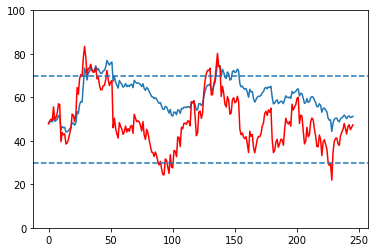

In [26]:
df.Close.plot()
pyplot.show()

df.RSI.plot(color='red')
pyplot.axhline(70, linestyle='--')
pyplot.axhline(30,linestyle='--')
pyplot.ylim([0,100])
pyplot.show()

Using this domain knowledge, we can create new categorical features based on whether the RSI range is above 70, below 30 or in between. 

In [43]:

df['rsi70'] = [1 if df.RSI[i]>=70 else 0 for i in range(len(df))]
df['rsi30'] = [1 if df.RSI[i]<=30 else 0 for i in range(len(df))]
df['rsiinrange']  = [1 if df.RSI[i]>30 and df.RSI[i]<70 else 0 for i in range(len(df)) ]

In [44]:
df

,Stock,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX,rsi70,rsi30,rsiinrange
Date,,,,,,,,,,,,,
2021-03-25,BHEL,48.20,47.837243,1.14,50.620095,49.984186,44.359176,13.521698,27.052287,25.770266,0,0,1
2021-03-26,BHEL,48.70,49.217338,1.14,50.316442,49.885692,44.539209,11.795044,26.153730,26.632177,0,0,1
2021-03-30,BHEL,48.95,49.930643,0.96,50.031634,49.777531,44.704338,11.387699,25.648988,27.480296,0,0,1
2021-03-31,BHEL,48.75,49.333639,0.95,50.198610,49.889194,44.949266,11.377414,24.695203,28.154517,0,0,1
2021-04-01,BHEL,50.95,55.619693,0.98,49.980681,49.804509,45.108118,14.616430,23.022029,27.738656,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16,BHEL,51.20,46.657319,1.53,50.828000,51.417695,54.402991,17.322229,29.810224,27.016193,0,0,1
2022-03-17,BHEL,51.40,47.357464,1.54,50.804727,51.349343,54.257775,18.838875,29.003034,26.603987,0,0,1
2022-03-21,BHEL,50.70,45.125007,1.53,50.840231,51.316072,54.130020,18.066207,30.050646,26.482770,0,0,1


## EMA

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points, unlike simple moving average.

Let's plot the EMA (moving averages) for periods of 10, 20 and 50 for the data which we have added as features. It results in smoothening of the data. The higher the period, the flatter the line plot. For any model we try, we can decide to keep or remove these features and see which one is affecting performance.

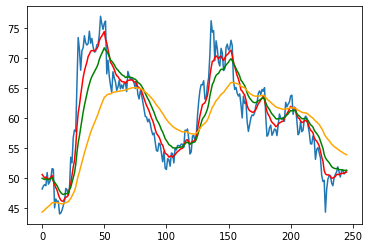

In [9]:
from matplotlib import pyplot

series = df.Close
series.plot()
df.ema10.plot(color='red')
df.ema20.plot(color='green')
df.ema50.plot(color='orange')
pyplot.show()

# series[:100].plot()
# rolling_mean[:100].plot(color='red')
# pyplot.show()

## DMI

DMI is the Directional Movement Indicator. It indicates the momentum of a trend whether it is weak or strong. Here, we have taken positive and negative DMI as features. The DI line that is on the top is considered the dominant one. Thus, first negative momentum is dominant and then positive and so on. For buying and selling trends to change, a crossover must occur.

Again, using this knowledge, we can create features about which DMI line is above.

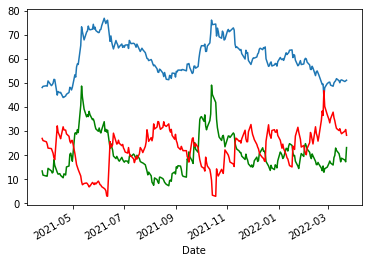

In [42]:
from matplotlib import pyplot

series = df.Close
series.plot()
df.posDI.plot(color='green')
df.negDI.plot(color='red')
# df.ADX.plot(color='orange')
pyplot.show()

# series[:100].plot()
# rolling_mean[:100].plot(color='red')
# pyplot.show()

In [45]:
df['posmomentum'] = [1 if df.posDI[i]>= df.negDI[i] else 0 for i in range(len(df))]
df['negmomentum'] = [1 if df.posDI[i]< df.negDI[i] else 0 for i in range(len(df))]
df

,Stock,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX,rsi70,rsi30,rsiinrange,posmomentum,negmomentum
Date,,,,,,,,,,,,,,,
2021-03-25,BHEL,48.20,47.837243,1.14,50.620095,49.984186,44.359176,13.521698,27.052287,25.770266,0,0,1,0,1
2021-03-26,BHEL,48.70,49.217338,1.14,50.316442,49.885692,44.539209,11.795044,26.153730,26.632177,0,0,1,0,1
2021-03-30,BHEL,48.95,49.930643,0.96,50.031634,49.777531,44.704338,11.387699,25.648988,27.480296,0,0,1,0,1
2021-03-31,BHEL,48.75,49.333639,0.95,50.198610,49.889194,44.949266,11.377414,24.695203,28.154517,0,0,1,0,1
2021-04-01,BHEL,50.95,55.619693,0.98,49.980681,49.804509,45.108118,14.616430,23.022029,27.738656,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16,BHEL,51.20,46.657319,1.53,50.828000,51.417695,54.402991,17.322229,29.810224,27.016193,0,0,1,0,1
2022-03-17,BHEL,51.40,47.357464,1.54,50.804727,51.349343,54.257775,18.838875,29.003034,26.603987,0,0,1,0,1
2022-03-21,BHEL,50.70,45.125007,1.53,50.840231,51.316072,54.130020,18.066207,30.050646,26.482770,0,0,1,0,1


## BETA

Beta is also called volatility. It tell us the volatility of the stock as compared to the index price, if it is more or less volatile. Value less than 1 means it is less volatile than index and more than 1 means it is more volatile.

DMI on its own is not an exact indicator of when to buy or sell. Based on volatility, it can give false signals or lag behind the actual trend. Therefore we are including Beta as feature as well. Again, we can make categorical variables out of whether it is more or less volatile.

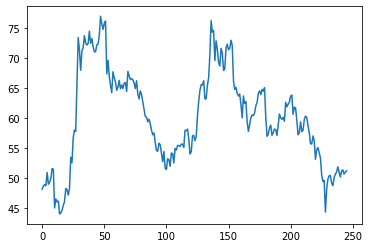

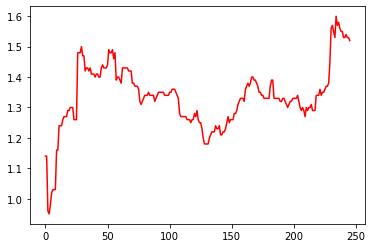

In [16]:
df.Close.plot()
pyplot.show()

df.Beta.plot(color='red')
pyplot.show()

In [47]:
df['isbetahigh'] = [1 if df.Beta[i]> 1 else 0 for i in range(len(df))]
df['isbetalow'] = [1 if df.Beta[i]<= 1 else 0 for i in range(len(df))]
df

,Stock,Close,RSI,Beta,ema10,ema20,ema50,posDI,negDI,ADX,rsi70,rsi30,rsiinrange,posmomentum,negmomentum,isbetahigh,isbetalow
Date,,,,,,,,,,,,,,,,,
2021-03-25,BHEL,48.20,47.837243,1.14,50.620095,49.984186,44.359176,13.521698,27.052287,25.770266,0,0,1,0,1,1,0
2021-03-26,BHEL,48.70,49.217338,1.14,50.316442,49.885692,44.539209,11.795044,26.153730,26.632177,0,0,1,0,1,1,0
2021-03-30,BHEL,48.95,49.930643,0.96,50.031634,49.777531,44.704338,11.387699,25.648988,27.480296,0,0,1,0,1,0,1
2021-03-31,BHEL,48.75,49.333639,0.95,50.198610,49.889194,44.949266,11.377414,24.695203,28.154517,0,0,1,0,1,0,1
2021-04-01,BHEL,50.95,55.619693,0.98,49.980681,49.804509,45.108118,14.616430,23.022029,27.738656,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16,BHEL,51.20,46.657319,1.53,50.828000,51.417695,54.402991,17.322229,29.810224,27.016193,0,0,1,0,1,1,0
2022-03-17,BHEL,51.40,47.357464,1.54,50.804727,51.349343,54.257775,18.838875,29.003034,26.603987,0,0,1,0,1,1,0
2022-03-21,BHEL,50.70,45.125007,1.53,50.840231,51.316072,54.130020,18.066207,30.050646,26.482770,0,0,1,0,1,1,0
